<a href="https://colab.research.google.com/github/anisalopezruiz/bio108tutorial/blob/main/Week7_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install leafmap
Installing the necessary libraries not already preloaded in Colab

In [ ]:
! pip install -U leafmap
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver

# Import libraries
Import the libraries we will use in this tutorial, including geospatial analyses libraries like geopandas and rasterio

In [ ]:
import os
import numpy as np
import pandas as pd
import shapely
import geopandas as gpd
import leafmap
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data
We will use data from the [Columbia Environmental Resource Center](https://www.usgs.gov/centers/columbia-environmental-research-center) or CERC, a research center under the US Geological Survey that focuses on environmental contaminants and their effects on aquatic and terrestrial ecosystems.

[This data](https://www.sciencebase.gov/catalog/item/668ebfabd34e537145a785dd) was collected by CERC. It represents the dike fields and macrohabitats of the lower Missouri River. We are interested in dike fields because they represent potential refuge habitat for fish from the fast-flowing river traffic.

Data accessible in a google drive folder [here](https://drive.google.com/drive/folders/1Yfoyn5ZaLGoBFFECe2BAseU78Ko3UPVW?usp=sharing).

In [ ]:
from google.colab import drive

# if you download the google drive folder to your drive,
# replace the file path with the one that corresponds to your drive.
# after /MyDrive/, put the file path depending on which folder you copied the files to.
dike_shp = '/content/drive/MyDrive/Bio108/dike_fields/lmor_dike_fields_PSPAP.shp'

In [ ]:
# read the correct file path into a geopandas dataframe
dike = gpd.read_file(dike_shp)

# Data exploration
Let's look at what our data looks like and what types of analyses we may be able to run.

In [ ]:
# let's look at the columns in our table
dike.head()

type macro   area_m2  bend_rm_us  bend_rm_ds  bend_rm_av  mac_trans dike_id  \
0    W  CHXO   8104.00       499.2       494.5      496.85          0  538.69   
1    W  CHXO  13702.20       499.2       494.5      496.85          0  538.72   
2    W   ISB   8860.31       501.8       500.5      501.15          0  541.99   
3    W   ISB   8275.61       501.8       500.5      501.15          0   542.1   
4    W  CHXO   8423.69       501.8       500.5      501.15          1   542.2   

   seg_pspap  bend_pspap near_bank  \
0          9          42      Left   
1          9          42      Left   
2          9          40      Left   
3          9          40      Left   
4          9          40      Left   

                                            geometry  
0  POLYGON ((293764.324 4437728.222, 293765.79 44...  
1  POLYGON ((293853.235 4437934.392, 293914.571 4...  
2  POLYGON ((294692.376 4440958.798, 294691.263 4...  
3  POLYGON ((294762.796 4441153.34, 294769.316 44...  
4  POLYGON ((294855.643 4441290.073, 294853.982 4...

From the [metadata](https://www.sciencebase.gov/catalog/file/get/668ebfabd34e537145a785dd?f=__disk__5a%2F5f%2Fdb%2F5a5fdb7c54d2b77e9d509ee48de3aed2ba78b813&transform=1&allowOpen=true), we see that the macro column represents the macrohabitat type, either inside bends (ISB), outside bends (OSB), or channel crossovers (CHXO).

Another useful column is area_m2, which provides us the area of the polygon. Let's find the total area of all potential suitable habitat area in this study.

In [ ]:
# Sum the total habitat area, and divide by 1e6 to change to km2
sum_suitable_habitat = dike['area_m2'].sum()/1000000
sum_suitable_habitat

131.744201591

Let's explore what our geonpandas looks like using .explore() function from leafmaps

In [ ]:
dike.explore()

# Analysis: suitable refuge habitat in Omaha Indian Reservation
The Omaha Indian Reservation wants to conduct habitat restoration along the Missouri River, prioritizing refuge habitat, in order to protect their fishing rights. The tribal government asked us to help them identify suitable habitat to prioritize for habitat restoration. We will calculate how much suitable habitat is within the reservation.

A map of tribal reservations in the US is available from geoplatform.gov [here](https://www.geoplatform.gov/metadata/ce7e61ae-e6d7-41dd-8090-927f65964e1e). I uploaded the files in this [google drive](https://drive.google.com/drive/folders/128prCThnU62Pf_46iIupsAPe9BLxSOUf?usp=sharing) folder.

First, let's import and read the necessary files.

In [ ]:
borders_shp = '/content/drive/MyDrive/Bio108/tl_2018_us_aiannh/tl_2018_us_aiannh.shp'
borders = gpd.read_file(borders_shp)

Let's take a look at our data

In [ ]:
borders.head()

AIANNHCE  AIANNHNS  GEOID                    NAME  \
0     2320  02419022  2320R                 Mohegan   
1     9100  01930930  9100R  Golden Hill Paugussett   
2     4110  02419484  4110R          Table Mountain   
3     1380  01666180  1380R              Greenville   
4     1110  00806894  1110R                Flathead   

                                     NAMELSAD LSAD CLASSFP COMPTYP AIANNHR  \
0                         Mohegan Reservation   86      D8       R       F   
1  Golden Hill Paugussett (state) Reservation   86      D4       R       S   
2                    Table Mountain Rancheria   85      D2       R       F   
3                        Greenville Rancheria   85      D2       R       F   
4                        Flathead Reservation   86      D2       R       F   

   MTFCC FUNCSTAT       ALAND     AWATER     INTPTLAT      INTPTLON  \
0  G2101        A     1767260          0  +41.4900915  -072.0940543   
1  G2101        A      399343          0  +41.5521875  -072.2680204   
2  G2101        A      551202          0  +36.9848914  -119.6359563   
3  G2101        A      284692          0  +40.1487839  -120.8933989   
4  G2101        A  5013467050  316267876  +47.4967703  -114.2842791   

                                            geometry  
0  MULTIPOLYGON (((-72.08912 41.4804, -72.089 41....  
1  MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ...  
2  POLYGON ((-119.64092 36.98425, -119.64081 36.9...  
3  POLYGON ((-120.89737 40.151, -120.89733 40.151...  
4  POLYGON ((-114.85121 47.88721, -114.81989 47.8...

Verify the location of the Omaha row in our dataframe

In [ ]:
borders[borders["NAME"]=="Omaha"]

AIANNHCE  AIANNHNS  GEOID   NAME           NAMELSAD LSAD CLASSFP COMPTYP  \
138     2550  00834985  2550R  Omaha  Omaha Reservation   86      D2       R   

    AIANNHR  MTFCC FUNCSTAT      ALAND   AWATER     INTPTLAT      INTPTLON  \
138       F  G2101        A  795209806  7669505  +42.0968907  -096.5306498   

                                              geometry  
138  POLYGON ((-96.8259 42.01778, -96.82587 42.0196...

Let's visualize the vector data and raster data together.

We have to make sure that the CRS for both are the same.

In [ ]:
print(borders.crs)
print(dike.crs)

EPSG:4269
EPSG:32615


In [ ]:
# store the row for Omaha Reservation as a geopanda dataframe
omaha = borders.loc[(borders.NAME=='Omaha')]

Because the CRS are not the same, we will add the correct CRS ESPG:32615 to the omaha geopanda dataframe

In [ ]:
# convert omaha crs to the dike layer crs
omaha  = omaha.to_crs(dike.crs)

Now let's clip the layers!

In [ ]:
# clip the layer in order to identify all the dike habitat in the Omaha reservation
refuge_habitat_clip = gpd.clip(dike, omaha)

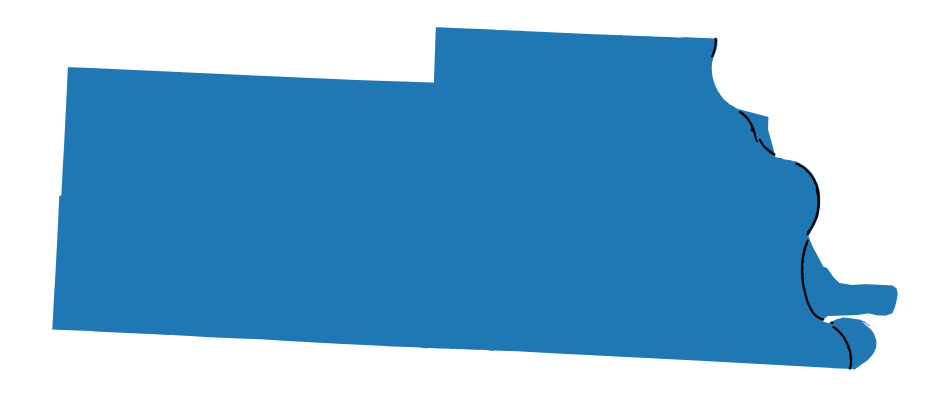

In [ ]:
# visualize the clip
fig, ax = plt.subplots(figsize=(12, 8))
omaha.plot(ax=ax)
refuge_habitat_clip.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)
ax.set_axis_off()
plt.show()

Now let's identify all the channel crossover habitat within our clip

In [ ]:
# add all the area of the suitable habitat in our clip and divide by 1e6 to convert to km2
refuge_habitat_clip['area_m2'].sum()/1000000

0.8800882599999998

There are 0.88 km^2 of potentially suitable habitat within the reservation!